Importing Libraries.

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import MaxPooling2D,Convolution2D,Dense,Dropout,Flatten,Input
import pickle
import pandas as pd


In [12]:
from IPython.display import Image

Importing Images from dataset.

In [17]:
path="C:/Users/Prathmesh/Documents/Untitled Folder/dataset"
count=0
dir=os.listdir(path)
imgs=[]
count=0
classno=[]

print("with and without mask")
nosf=len(dir)
print("getting images")

for x in range(0,nosf):
    mypics=os.listdir(path+"/"+str(count))
    for y in mypics:
        curimg = cv2.imread(path+"/"+str(count)+"/"+y)
        imgs.append(curimg)
        classno.append(count)
    print(count,end=" ")
    count+=1
print(" ")

imgnp=np.array(imgs)
clsnp=np.array(classno)
        
    





with and without mask
getting images
0 1  


Splitting data for training testing and validation.

In [162]:
x_train, x_test, y_train, y_test = train_test_split(imgnp,clsnp,test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.2)


In [166]:
from keras.preprocessing.image import ImageDataGenerator #for generation images in batches

Preprocess the images.

In [167]:
def processing(img):
    img = cv2.resize(img,(28,28))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

In [168]:
x_train = np.array(list(map(processing,x_train)))
x_test = np.array(list(map(processing,x_test)))
x_valid = np.array(list(map(processing,x_valid)))

Reshaping the image to add depth.

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt #importing matplotlib for visualization


In [169]:
x_train=x_train.reshape(880,28,28,1)
x_test=x_test.reshape(276,28,28,1)
x_valid=x_valid.reshape(220,28,28,1)

Augmenting images.

In [170]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
datagen.fit(x_train)

In [171]:

batch = datagen.flow(x_train,y_train,batch_size=20)
x_batch, y_batch = next(batch)





Converting train,test and validation labels in categorical form or simply on hot encoding.

In [172]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)


Building the model.

In [176]:
def mymod():
    
    model = Sequential()
    
    model.add(Convolution2D(60,(5,5),activation='relu',input_shape=(28,28,1)))
    model.add(Convolution2D(60,(5,5),activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Convolution2D(30,(3,3),activation='relu'))
    model.add(Convolution2D(30,(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
        
    

Getting the summary of model.

In [177]:
mod = mymod()
print(mod.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 60)        1560      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 20, 20, 60)        90060     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 60)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 30)          16230     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 6, 30)          8130      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 30)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 3, 30)         

Training the model and svaing it into history, (if you are using GPU then it trains significantly faster).

In [181]:
history = mod.fit_generator(datagen.flow(x_train,y_train,batch_size=50),
                             steps_per_epoch=880,
                             epochs=11,
                             validation_data=(x_valid,y_valid),
                             shuffle=1)

Epoch 1/11
880/880 [==============================] - 27s 31ms/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.2449 - val_accuracy: 0.9682 loss:
Epoch 2/11
880/880 [==============================] - 26s 30ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.2131 - val_accuracy: 0.9591
Epoch 3/11
880/880 [==============================] - 26s 30ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.3220 - val_accuracy: 0.9682
Epoch 4/11
880/880 [==============================] - 26s 30ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.2072 - val_accuracy: 0.9773
Epoch 5/11
880/880 [==============================] - 26s 30ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.1734 - val_accuracy: 0.9727
Epoch 6/11
880/880 [==============================] - 26s 30ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.2342 - val_accuracy: 0.9636
Epoch 7/11
880/880 [==============================] - 26s 30ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.2350 - val_acc

Evaluating the models accuracy.

In [183]:
score = mod.evaluate(x_test,y_test)
print(score[0])
print(score[1])

276/276 [==============================] - 0s 1ms/step
0.6457240499307838
0.9528985619544983


Saving the model in pickle object.

In [184]:
pik = open("ready.p","wb")
pickle.dump(mod,pik)
pik.close()
cv2.waitKey(0)

-1

Visualizing the data.

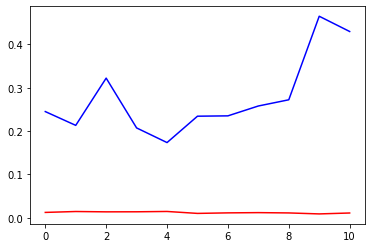

In [186]:
plt.figure(0)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

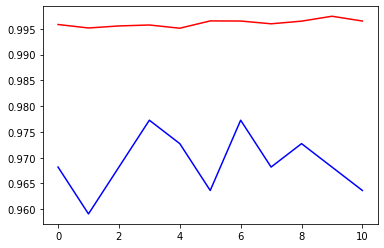

In [187]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Verifying the results by predicting.

In [188]:
y_pred=mod.predict(x_test)

Testing for any image.

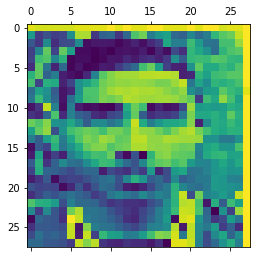

In [190]:
plt.matshow(x_test[0].reshape(28,28))

In [192]:
np.argmax(y_pred[0]) #it predicted correctly as 1 belongs to class of no mask.

1

(Even though the loss is more you can still make changes in the model and yield better results.)